# data uploading

In [1]:
#FOR COLAB:
import pandas as pd
import numpy as np
import scipy.io as sio
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(  name=fn, length=len(uploaded[fn])))

Saving Solar+Data+Set.csv to Solar+Data+Set.csv
User uploaded file "Solar+Data+Set.csv" with length 202574 bytes


In [2]:

df = pd.read_csv("Solar+Data+Set.csv")

df.head(32)

,Date,Solar Ir
0,1/1/2019 0:00,0.000000
1,1/1/2019 1:00,0.000000
2,1/1/2019 2:00,0.000000
3,1/1/2019 3:00,0.000000
4,1/1/2019 4:00,0.000000
5,1/1/2019 5:00,0.000000
6,1/1/2019 6:00,0.000000
7,1/1/2019 7:00,0.000000
8,1/1/2019 8:00,0.016447
9,1/1/2019 9:00,0.093861


## univariate lstm

Epoch 1/10
272/272 [==============================] - 33s 86ms/step - loss: 0.0290
Epoch 2/10
272/272 [==============================] - 20s 73ms/step - loss: 0.0075
Epoch 3/10
272/272 [==============================] - 19s 69ms/step - loss: 0.0051
Epoch 4/10
272/272 [==============================] - 18s 65ms/step - loss: 0.0035
Epoch 5/10
272/272 [==============================] - 19s 70ms/step - loss: 0.0027
Epoch 6/10
272/272 [==============================] - 18s 65ms/step - loss: 0.0021
Epoch 7/10
272/272 [==============================] - 19s 70ms/step - loss: 0.0022
Epoch 8/10
272/272 [==============================] - 19s 68ms/step - loss: 0.0019
Epoch 9/10
272/272 [==============================] - 28s 104ms/step - loss: 0.0016
Epoch 10/10
1/1 [==============================] - 0s 26ms/step


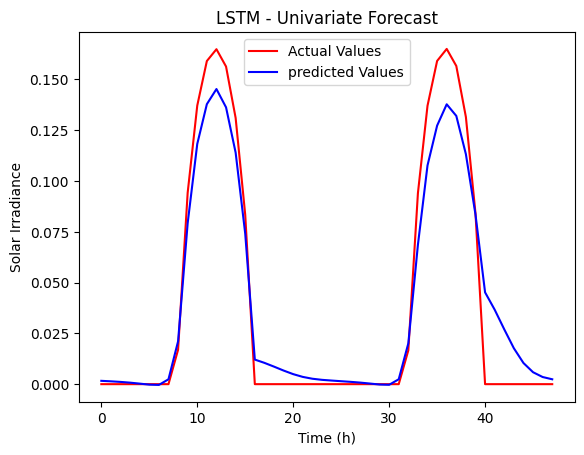

In [4]:
"""
LSTM - Single Variate

"""
# Preprocessing

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# df = pd.read_csv("/Users/rozhinmt/Downloads/Solar+Data+Set.csv")

# df.dropna(inplace=True)



training_set = df.iloc[:8712,1:2].values
test_set = df.iloc[8712:,1:2].values


from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler(feature_range = (0,1))

training_set_scaled = sc.fit_transform(training_set)
test_set_scaled = sc.fit_transform(test_set)

X_train = []
y_train = []
WS = 24

for i in range(WS, len(training_set_scaled)):
    X_train.append(training_set_scaled[i-WS:i, 0:1])
    y_train.append(training_set_scaled[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)

# # Developing LSTM Model

from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout

Model_P = Sequential()

Model_P.add(LSTM(units = 60, return_sequences = True, input_shape = (X_train.shape[1],1)))
Model_P.add(Dropout(0.2))

Model_P.add(LSTM(units = 60, return_sequences = True))
Model_P.add(Dropout(0.2))

Model_P.add(LSTM(units = 60, return_sequences = True))
Model_P.add(Dropout(0.2))

Model_P.add(LSTM(units = 60))
Model_P.add(Dropout(0.2))

Model_P.add(Dense(units = 1))

Model_P.compile(optimizer = 'adam', loss = 'mean_squared_error')



Model_P.fit(X_train, y_train, epochs = 10, batch_size = 32) # we can change epochs






Model_P.save('LSTM - UniVariat')

from keras.models import load_model
Model_P = load_model('LSTM - UniVariat')




# plt.plot(range(len(Model_P.history.history['loss'])),Model_P.history.history['loss'] )
# plt.xlabel('Epoch Number')
# plt.ylabel('Loss')
# plt.show()


prediction_test = []

Batch_one = training_set_scaled[-WS:]
Batch_New = Batch_one.reshape((1,WS,1))

for i in range(48):

    First_Pred = Model_P.predict(Batch_New)[0]

    prediction_test.append(First_Pred)

    Batch_New = np.append(Batch_New[:,1:,:], [[First_Pred]], axis = 1)


prediction_test = np.array(prediction_test)

predictions = sc.inverse_transform(prediction_test)


plt.plot(test_set, color = 'red', label = 'Actual Values')
plt.plot(predictions, color = 'blue', label = 'predicted Values')
plt.title('LSTM - Univariate Forecast')
plt.xlabel('Time (h)')
plt.ylabel('Solar Irradiance')
plt.legend()
plt.show()

import math

from sklearn.metrics import mean_squared_error

RMSE = math.sqrt(mean_squared_error(test_set, predictions))

from sklearn.metrics import r2_score

Rsquare = r2_score(test_set, predictions)










































In [ ]:
# Model_P.history['loss']

In [ ]:
# Model_P.fite()

Epoch 1/3
272/272 [==============================] - 27s 68ms/step - loss: 0.0021
Epoch 2/3
272/272 [==============================] - 17s 64ms/step - loss: 0.0015
Epoch 3/3
272/272 [==============================] - 20s 73ms/step - loss: 0.0014


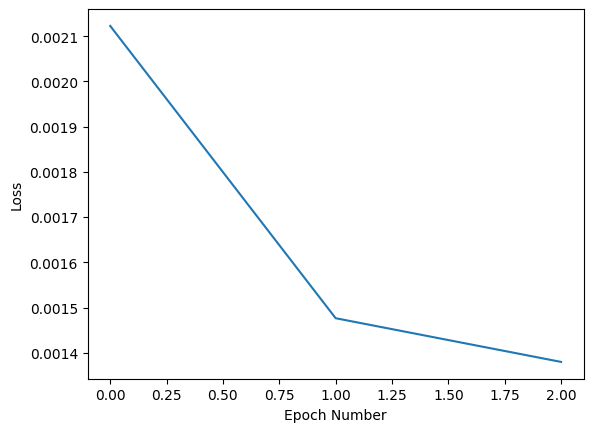

In [5]:
import pickle

# Train model and save history
history = Model_P.fit(X_train, y_train, epochs=3, batch_size=32)#, return_history=True)
with open('history.pickle', 'wb') as f:
    pickle.dump(history.history, f)

# Load model and history
Model_P = load_model('LSTM - UniVariat')
with open('history.pickle', 'rb') as f:
    history = pickle.load(f)

# Plot history
plt.plot(range(len(history['loss'])), history['loss'])
plt.xlabel('Epoch Number')
plt.ylabel('Loss')
plt.show()

In [ ]:

#pytorch implementing


In [23]:
import torch
import torch.nn as nn

class LSTMModel(nn.Module):
    def __init__(self):
        super(LSTMModel, self).__init__()
        self.lstm1 = nn.LSTM(input_size=1, hidden_size=60, batch_first=True)
        self.dropout1 = nn.Dropout(p=0.2)
        self.lstm2 = nn.LSTM(input_size=60, hidden_size=60, batch_first=True)
        self.dropout2 = nn.Dropout(p=0.2)
        self.lstm3 = nn.LSTM(input_size=60, hidden_size=60, batch_first=True)
        self.dropout3 = nn.Dropout(p=0.2)
        self.lstm4 = nn.LSTM(input_size=60, hidden_size=60, batch_first=True)
        self.dropout4 = nn.Dropout(p=0.2)
        self.fc = nn.Linear(60, 1)

    def forward(self, x):
        x, _ = self.lstm1(x)
        x = self.dropout1(x)
        x, _ = self.lstm2(x)
        x = self.dropout2(x)
        x, _ = self.lstm3(x)
        x = self.dropout3(x)
        x, _ = self.lstm4(x)
        x = self.dropout4(x)
        x = self.fc(x[:, -1, :])  # Only take the output from the last time step
        return x




model = LSTMModel()
criterion = nn.MSELoss()  # Equivalent to 'mean_squared_error' in Keras
optimizer = torch.optim.Adam(model.parameters())  # Equivalent to 'adam' in Keras



loss_values = []  # List to store the loss values

num_epochs = 10
batch_size = 32

# Convert the training data to PyTorch tensors
X_train_torch = torch.tensor(X_train).float()
y_train_torch = torch.tensor(y_train).float()

# Reshape the data to [batch_size, sequence_length, num_features]
X_train_torch = X_train_torch.view(-1, X_train.shape[1], 1)
y_train_torch = y_train_torch.view(-1, 1)

for epoch in range(num_epochs):
    for i in range(0, len(X_train_torch), batch_size):
        X_batch = X_train_torch[i:i+batch_size, :, :]
        y_batch = y_train_torch[i:i+batch_size, :]

        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f'Epoch {epoch+1}/{num_epochs}, Loss: {loss.item()}')
    loss_values.append(loss.item())  # Append the loss value for this epoch





Epoch 1/10, Loss: 0.004889745730906725
Epoch 2/10, Loss: 0.0026066044811159372
Epoch 3/10, Loss: 0.003131636418402195
Epoch 4/10, Loss: 0.0038481932133436203
Epoch 5/10, Loss: 0.0016371890669688582
Epoch 6/10, Loss: 0.002863250207155943
Epoch 7/10, Loss: 0.0012393476208671927
Epoch 8/10, Loss: 0.0016890590777620673
Epoch 9/10, Loss: 0.003080021822825074
Epoch 10/10, Loss: 0.0015369841130450368


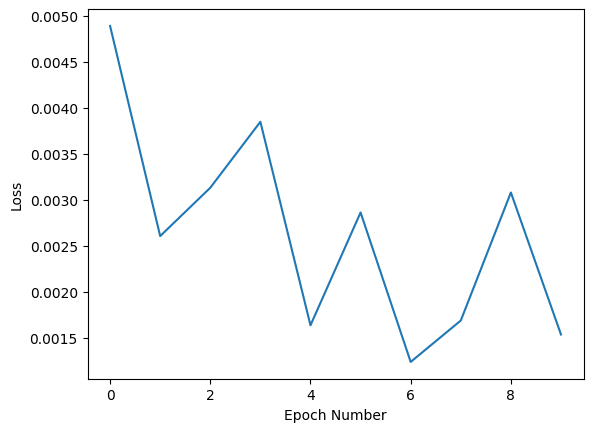

In [24]:
import matplotlib.pyplot as plt

plt.plot(range(len(loss_values)), loss_values)
plt.xlabel('Epoch Number')
plt.ylabel('Loss')
plt.show()


In [25]:
import torch
import numpy as np

def predict(model, batch):
    model.eval()
    with torch.no_grad():
        return model(batch)

# Prepare the data for the prediction
Batch_one = training_set_scaled[-WS:]
Batch_New = torch.tensor(Batch_one).float().unsqueeze(0)

prediction_test = []

for i in range(48):
    First_Pred = predict(model, Batch_New)
    prediction_test.append(First_Pred.item())
    Batch_New = torch.cat((Batch_New[:, 1:, :], First_Pred.unsqueeze(0)), dim=1)

prediction_test = np.array(prediction_test)
# Apply inverse transformation using the scaler
predictions = sc.inverse_transform(prediction_test.reshape(-1, 1))
predictions

array([[ 6.28794363e-05],
       [ 6.37562118e-05],
       [ 6.03708501e-05],
       [ 5.78930063e-05],
       [ 5.80061386e-05],
       [ 2.06417299e-05],
       [-2.15906888e-04],
       [-7.27175214e-04],
       [ 1.07245174e-02],
       [ 7.33439203e-02],
       [ 1.16701784e-01],
       [ 1.39008192e-01],
       [ 1.44576595e-01],
       [ 1.37602066e-01],
       [ 1.13128347e-01],
       [ 6.37678890e-02],
       [ 1.41314444e-03],
       [-3.10173042e-03],
       [-1.07112944e-03],
       [-3.56109806e-04],
       [-1.17614575e-04],
       [-1.96518221e-05],
       [ 2.70632189e-05],
       [ 4.94720265e-05],
       [ 5.88152806e-05],
       [ 6.02884602e-05],
       [ 5.78425886e-05],
       [ 5.66424022e-05],
       [ 5.56303598e-05],
       [ 5.18318192e-06],
       [-2.64689053e-04],
       [-7.58107066e-04],
       [ 1.50953933e-02],
       [ 8.07549974e-02],
       [ 1.20946214e-01],
       [ 1.40508593e-01],
       [ 1.44368766e-01],
       [ 1.35908652e-01],
       [ 1.0

In [ ]:
import matplotlib.pyplot as plt

plt.plot(range(len(loss_values)), loss_values)
plt.xlabel('Epoch Number')
plt.ylabel('Loss')
plt.show()


## multivariate lstm

In [ ]:
#FOR COLAB:
import pandas as pd
import numpy as np
import scipy.io as sio
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(  name=fn, length=len(uploaded[fn])))

Saving Electricity+Consumption.csv to Electricity+Consumption.csv
User uploaded file "Electricity+Consumption.csv" with length 323921 bytes


In [ ]:

df2 = pd.read_csv("Electricity+Consumption.csv")

df2.head(32)

,DATE,Humidity,Temperature,Electricity
0,2020-01-01 00:00:00 EST,92,-1.1,914
1,2020-01-01 01:00:00 EST,92,-1.5,887
2,2020-01-01 02:00:00 EST,91,-1.5,865
3,2020-01-01 03:00:00 EST,88,-1.1,852
4,2020-01-01 04:00:00 EST,87,-1.3,852
5,2020-01-01 05:00:00 EST,88,-1.1,870
6,2020-01-01 06:00:00 EST,88,-0.9,902
7,2020-01-01 07:00:00 EST,89,-0.9,921
8,2020-01-01 08:00:00 EST,90,-0.9,940
9,2020-01-01 09:00:00 EST,92,-0.9,975


In [ ]:
"""
LSTM - MultiVariate

"""
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# DATA Reference: https://www.ieso.ca/power-data

# df = pd.read_csv('Electricity Consumption.csv')



df = df2.copy()
df.dropna(inplace=True)


import seaborn as sn
sn.heatmap(df.corr())

training_set = df.iloc[:8712, 1:4].values
test_set = df.iloc[8712:, 1:4].values

from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler(feature_range = (0,1))

training_set_scaled = sc.fit_transform(training_set)
test_set_scaled = sc.fit_transform(test_set)

test_set_scaled = test_set_scaled[:, 0:2]

X_train = []
y_train = []
WS = 24

for i in range(WS, len(training_set_scaled)):
    X_train.append(training_set_scaled[i-WS:i, 0:3])
    y_train.append(training_set_scaled[i,2])

X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train,(X_train.shape[0], X_train.shape[1], 3))

from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout


Model = Sequential()

Model.add(LSTM(units = 70, return_sequences = True, input_shape = (X_train.shape[1], 3)))
Model.add(Dropout(0.2))

Model.add(LSTM(units = 70, return_sequences = True))
Model.add(Dropout(0.2))

Model.add(LSTM(units = 70, return_sequences = True))
Model.add(Dropout(0.2))

Model.add(LSTM(units = 70))
Model.add(Dropout(0.2))

Model.add(Dense(units = 1))

Model.compile(optimizer = 'adam', loss = 'mean_squared_error')

Model.fit(X_train,y_train, epochs = 80, batch_size = 32)

plt.plot(range(len(Model.history.history['loss'])), Model.history.history['loss'])
plt.xlabel('Epoch Number')
plt.ylabel('Loss')
plt.show()

Model.save('LSTM - Multivariate')

from keras.models import load_model
Model = load_model('LSTM - Multivariate')

prediction_test = []

Batch_one = training_set_scaled[-24:]
Batch_New = Batch_one.reshape((1,24,3))

for i in range(48):

    First_pred = Model.predict(Batch_New)[0]

    prediction_test.append(First_pred)

    New_var = test_set_scaled[i,:]

    New_var = New_var.reshape(1,2)

    New_test = np.insert(New_var, 2, [First_pred], axis =1)

    New_test = New_test.reshape(1,1,3)

    Batch_New = np.append(Batch_New[:,1:,:], New_test, axis=1)

prediction_test = np.array(prediction_test)

SI = MinMaxScaler(feature_range = (0,1))
y_Scale = training_set[:,2:3]
SI.fit_transform(y_Scale)

predictions = SI.inverse_transform(prediction_test)

real_values = test_set[:, 2]

plt.plot(real_values, color = 'red', label = 'Actual Electrical Consumption')
plt.plot(predictions, color = 'blue', label = 'Predicted Values')
plt.title('Electrical Consumption Prediction')
plt.xlabel('Time (hr)')
plt.ylabel('Electrical Demand (MW)')
plt.legend()
plt.show()

import math
from sklearn.metrics import mean_squared_error
RMSE = math.sqrt(mean_squared_error(real_values,predictions))


def mean_absolute_percentage_error (y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred)/y_true)) * 100

MAPE = mean_absolute_percentage_error(real_values,predictions)
















